In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
df = pd.read_csv('Data/bs140513_032310.csv')
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


# Data Cleaning

In [3]:
# Removing quotes from categorical fields
for col in ['customer','age','gender','zipcodeOri','merchant','zipMerchant','category']:
    df[col] = df[col].apply(lambda x: x.replace("'",""))

In [4]:
df.dtypes

step             int64
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object

In [5]:
# zipcode columns only contain 1 value and can be dropped
df.drop(['zipcodeOri','zipMerchant'], axis=1, inplace=True)

In [6]:
df['fraud'].value_counts()

fraud
0    587443
1      7200
Name: count, dtype: int64

Data is heavily imbalanced towards non-fraudulent activities.

Will need to tackle this using methods such as up or down sampling

In [7]:
# What is the distribution of the fraud variable for where age = 'U'
df[df['age'] == 'U']['fraud'].value_counts()

fraud
0    1171
1       7
Name: count, dtype: int64

Since the dataset is heavily biased towards non-frauds, we will drop all rows where age = 'U' as we have no information of what this means.

In [8]:
# Removing all rows where age is 'U'
df = df[df['age'] != 'U']

# Converting age column into data type int
df['age'] = df['age'].astype(int)

/tmp/ipykernel_9661/3414429165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int)


In [9]:
for col in ['gender', 'customer', 'merchant', 'category']:
    print(f"\nDuplicated Values in {col}")
    print(df[col].duplicated().value_counts())


Duplicated Values in gender
gender
True     593462
False         3
Name: count, dtype: int64

Duplicated Values in customer
customer
True     589362
False      4103
Name: count, dtype: int64

Duplicated Values in merchant
merchant
True     593415
False        50
Name: count, dtype: int64

Duplicated Values in category
category
True     593450
False        15
Name: count, dtype: int64


# Data Visualization

### Categorical Variables

In [10]:
df.columns

Index(['step', 'customer', 'age', 'gender', 'merchant', 'category', 'amount',
       'fraud'],
      dtype='object')

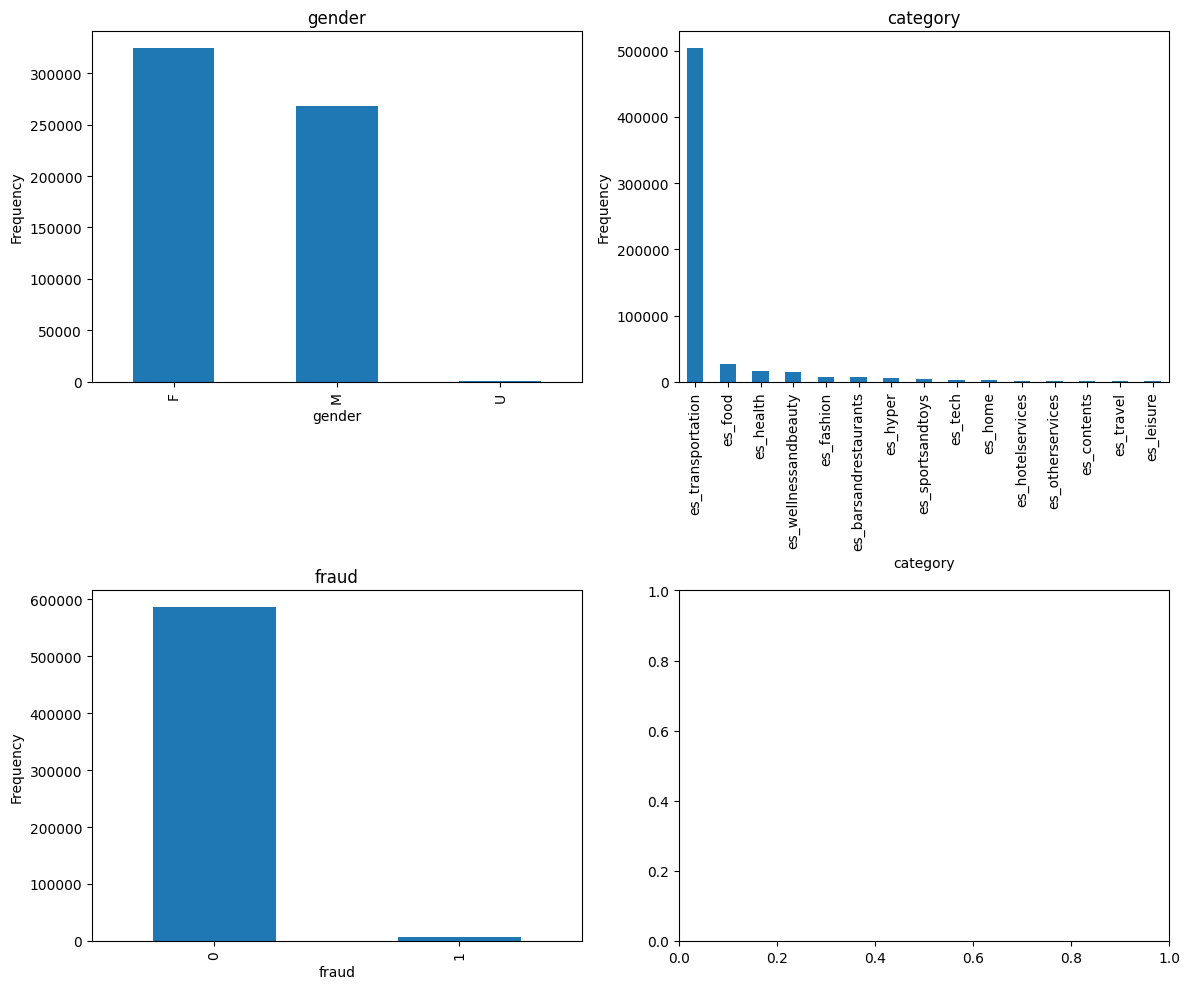

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

cols = ['gender', 'category', 'fraud']

for i, col in enumerate(cols):
    ax = axes[i // 2, i % 2]  # Calculate the subplot position
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Numerical Variables

<Axes: >

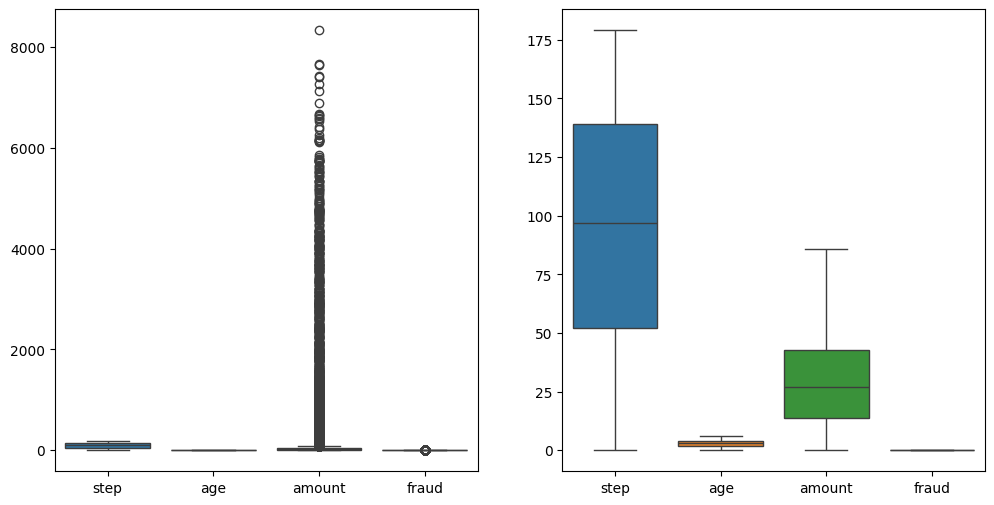

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(12,6))
sns.boxplot(ax = ax1, data=df)
sns.boxplot(ax = ax2, data=df, showfliers=False)

Age seems to foolow a normal distribution and somewhat step as well but amount is heavily skewed to the right.

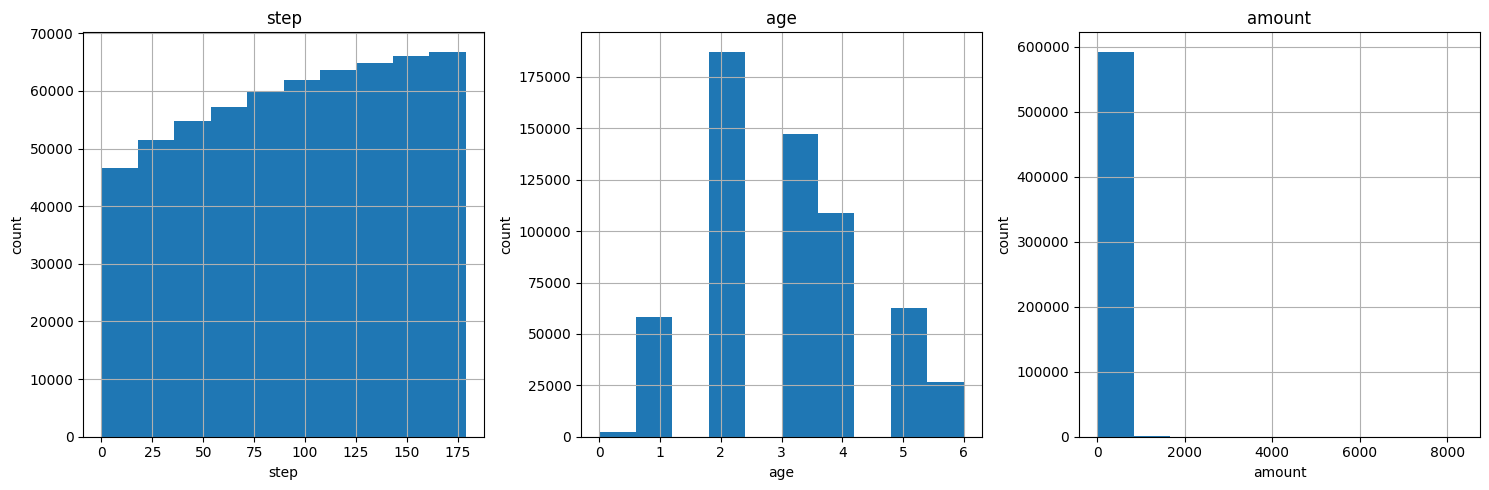

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

cols = ['step', 'age', 'amount']

for i, col in enumerate(cols):
    ax = axes[i]  # Calculate the subplot position
    df[col].hist(ax=ax)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('count')

plt.tight_layout()
plt.show()

### Relationship of each variable with fraud

Below is a bar graph of the categorical columns arranged by the highest number of frauds

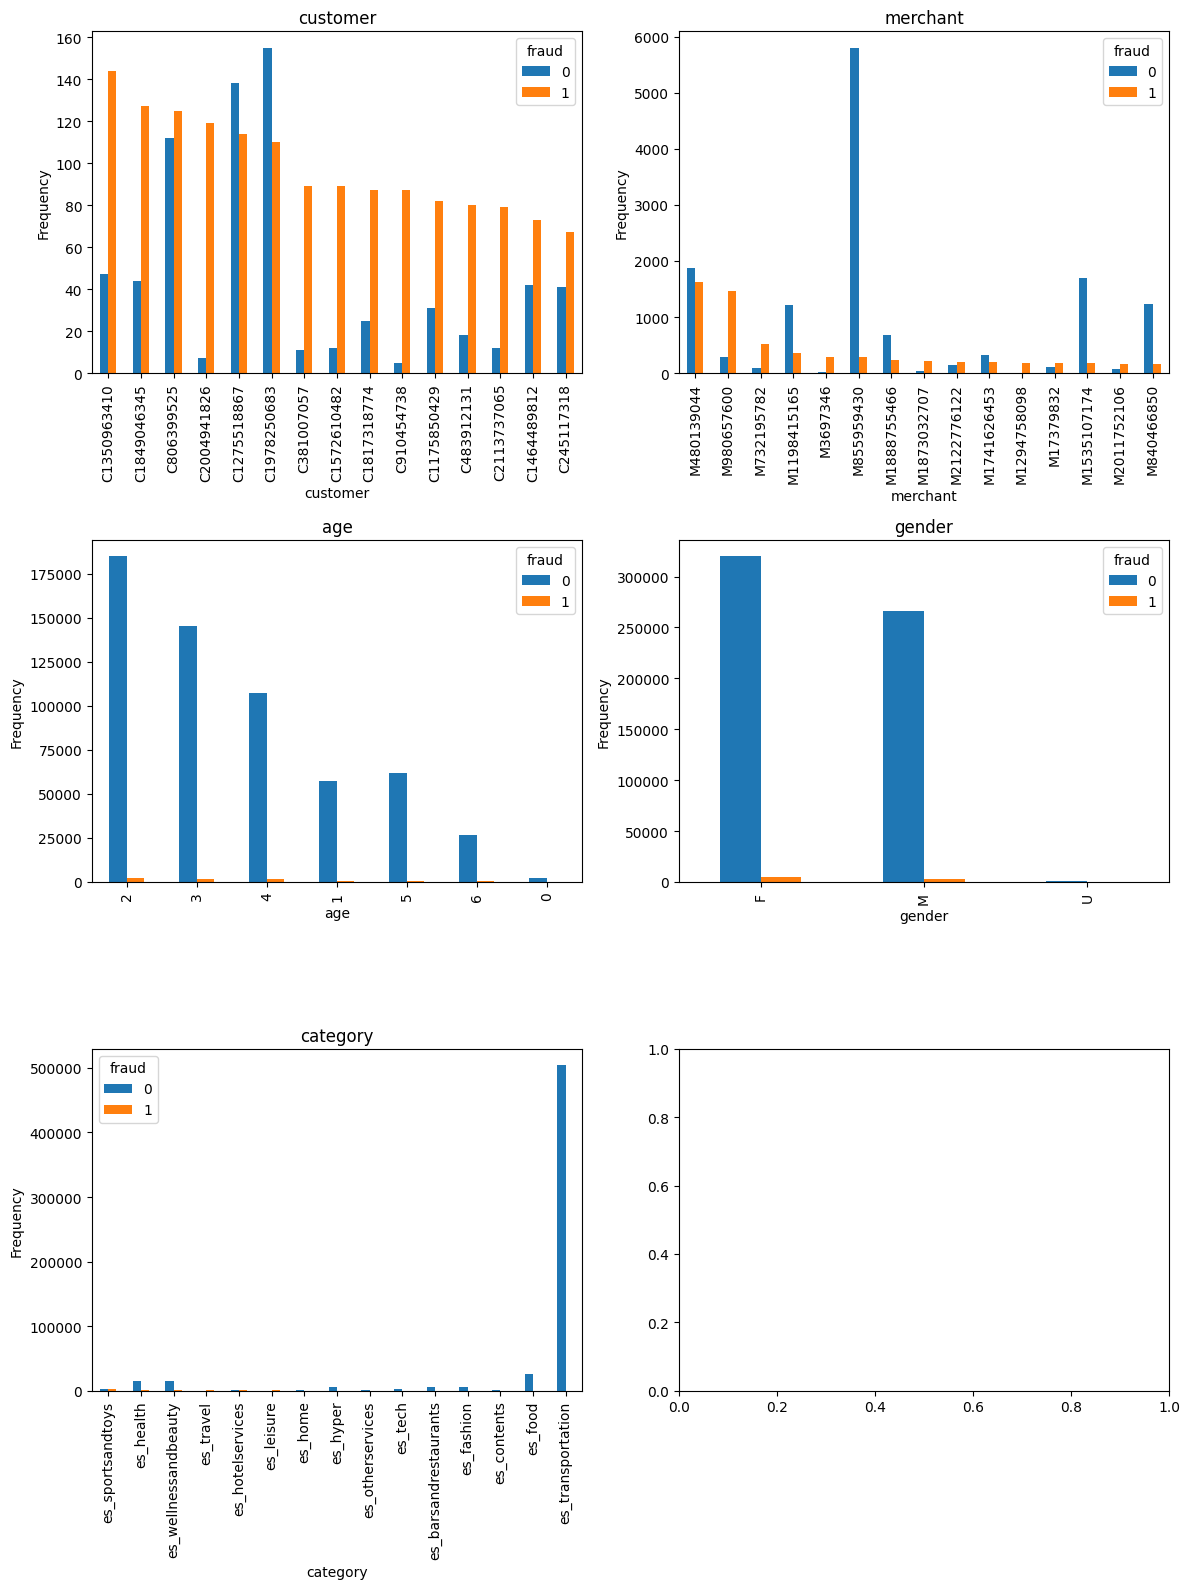

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))

cols = ['customer', 'merchant', 'age', 'gender', 'category']

for i, col in enumerate(cols):
    ax = axes[i // 2, i % 2]  # Calculate the subplot position
    df.groupby([col, 'fraud']).size().unstack().sort_values(by=1, ascending=False).head(15).plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Seems to be an equal range of fraud and non-fraud activities for step and age but higher amounts have significantly more frauds.

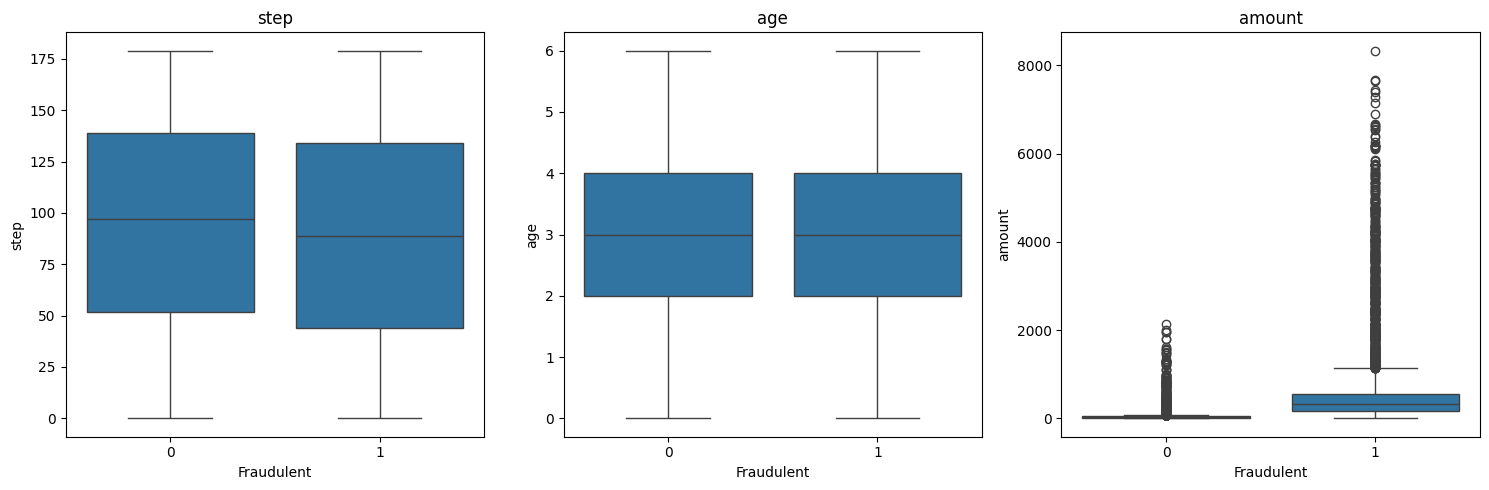

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

cols = ['step', 'age', 'amount']

for i, col in enumerate(cols):
    ax = axes[i]  # Calculate the subplot position
    sns.boxplot(data=df, y=col, x='fraud', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Fraudulent')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

There are 2 insights we can take away from here:

1. Frauds usually tend to occur on the higher ranges of transaction amounts for each category
2. Transactions for es_travel category especially has much higher range than others (although we can note from the graph above that this was only the 4th most frequent type of transaction activity occuring in this dataset)

<Axes: xlabel='amount', ylabel='category'>

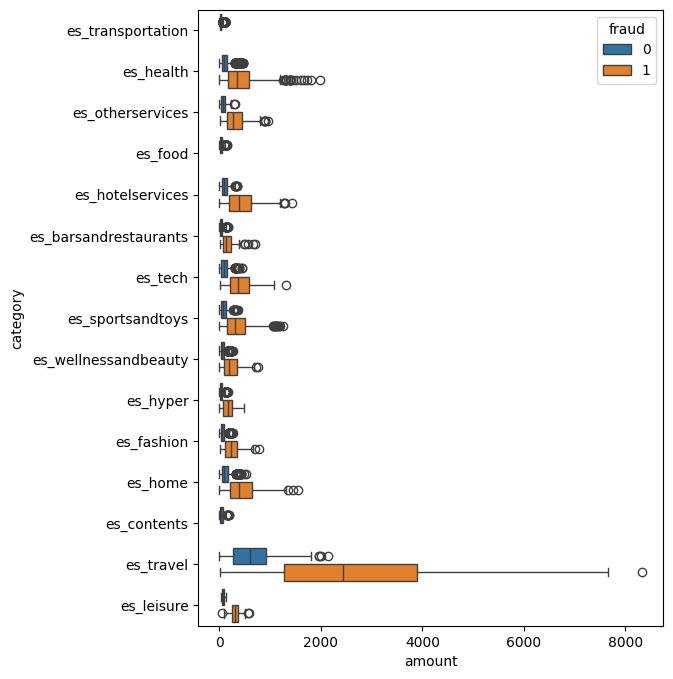

In [16]:
plt.figure(figsize=(6,8))
sns.boxplot(data=df, x='amount', y='category', hue='fraud')

<Axes: xlabel='amount', ylabel='age'>

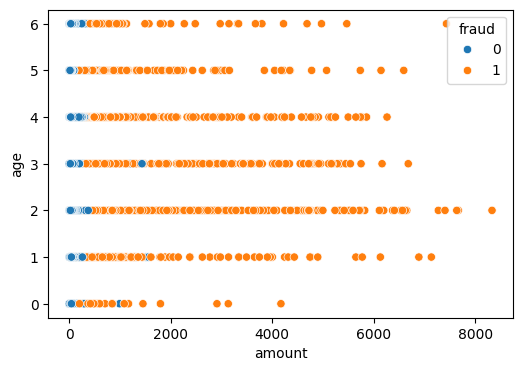

In [17]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='amount', y='age', hue='fraud')

<Axes: xlabel='amount', ylabel='gender'>

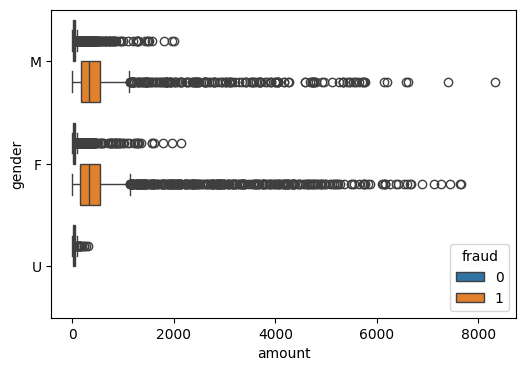

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='amount', y='gender', hue='fraud')

Amount has a significant correlation with fraud such that, the higher the amount of the transaction is, the greater chances of the transaction being a fraud.

<Axes: >

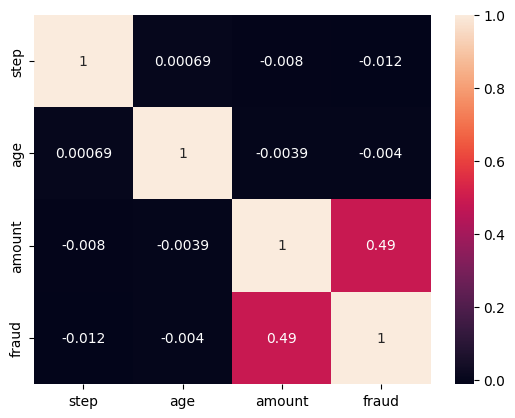

In [19]:
sns.heatmap(df[['step','age','amount','fraud']].corr(), annot=True)

In [20]:
df.to_csv('Data/data_cleaned.csv', index=False)

## Summary of Findings

1. There are significantly more non-fraud transactions than fraud suggesting the dataset is highly imbalanced which needs to be addressed in the data modelling section.
2. Amount is highly correlated with fraud such that, the higher the amount of the transaction is, the greater chance of it being a fraud.
3. Highest number of fraudulent activites comes from the category es_sportsandtoys but the highest fraudulent transaction ranges are for es_transportation.
4. The bank faced the most number of fraudulent activities from between 2 to 4 years ago but have seen a decrease since then suggesting that their ability to detect fraud has been improving.